In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, unique
from astropy.io import ascii

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Bulge-to-disk ratio from Mendez-Abreu et al. (2017 A&A 598, A32).

In [2]:
bttab = ascii.read("http://cdsarc.u-strasbg.fr/ftp/J/A+A/598/A32/table1.dat", 
                   readme="http://cdsarc.u-strasbg.fr/ftp/J/A+A/598/A32/ReadMe", format='cds')
#bttab.show_in_notebook()

In [3]:
califa_id = ascii.read('../dat_glob/external/build/CALIFAid.csv', format='csv')
califa_id.rename_column('Name', 'EDGEname')
califa_id.rename_column('ID', 'CALIFA')
keep = Table([bttab['Galaxy'], bttab['CALIFA'], bttab['BTr'], bttab['DTr']])
keep.sort(['CALIFA','BTr'])
# For galaxies with multiple fits choose the highest bulge fraction
uniqid = unique(keep, keys='CALIFA')
joint = join(uniqid,califa_id,keys='CALIFA',join_type='left')
#joint.show_in_notebook()

In [4]:
joint.write('buldisk.csv',format='ascii.ecsv',delimiter=',',overwrite=True)

In [5]:
notedge = joint['EDGEname'].mask
print(joint['EDGEname'][~notedge])

EDGEname
--------
 NGC7819
 NGC0447
 NGC0477
  IC1683
 NGC0496
 NGC0528
 NGC0551
 NGC1167
UGC03253
 NGC2253
     ...
 NGC6063
  IC1199
 NGC6125
 NGC6146
 NGC6155
 NGC6186
 NGC6301
 NGC6314
 NGC6394
 NGC6478
 NGC7738
Length = 74 rows


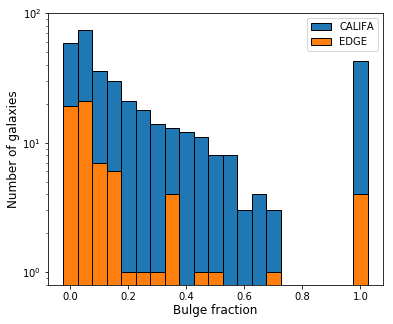

In [6]:
plt.figure(figsize=(6, 5))
hbins = np.arange(0, 1.1, 0.05)
plt.hist(joint['BTr'], bins=hbins, ec='black', align='left', label='CALIFA')
plt.hist(joint['BTr'][~notedge], bins=hbins, ec='black', align='left', label='EDGE')
plt.gca().set_yscale("log")
plt.gca().set_ylim(0.8,100)
plt.xlabel('Bulge fraction', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
plt.legend()
plt.show()